In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('apple_quality_sp.csv', index_col = 'A_id')

df['Calidad'] = df['Calidad'].map({'good': 1, 'bad': 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4002 entries, 0.0 to nan
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tamano     3998 non-null   float64
 1   Peso       4000 non-null   float64
 2   Dulzor     3997 non-null   float64
 3   Textura    4000 non-null   float64
 4   Jugosidad  3999 non-null   float64
 5   Madurez    4001 non-null   float64
 6   Acidez     3999 non-null   float64
 7   Calidad    4000 non-null   float64
dtypes: float64(8)
memory usage: 281.4 KB


Eliminar outliers

In [20]:
def Clean_outliers(df):

    df.dropna(inplace = True)
    
    upper_lim = df.mean() + 5*df.std()

    mask = (df > upper_lim)
    clean_df = df[~mask.any(axis=1)]
    return clean_df

df = Clean_outliers(df)

Vidualizar datos

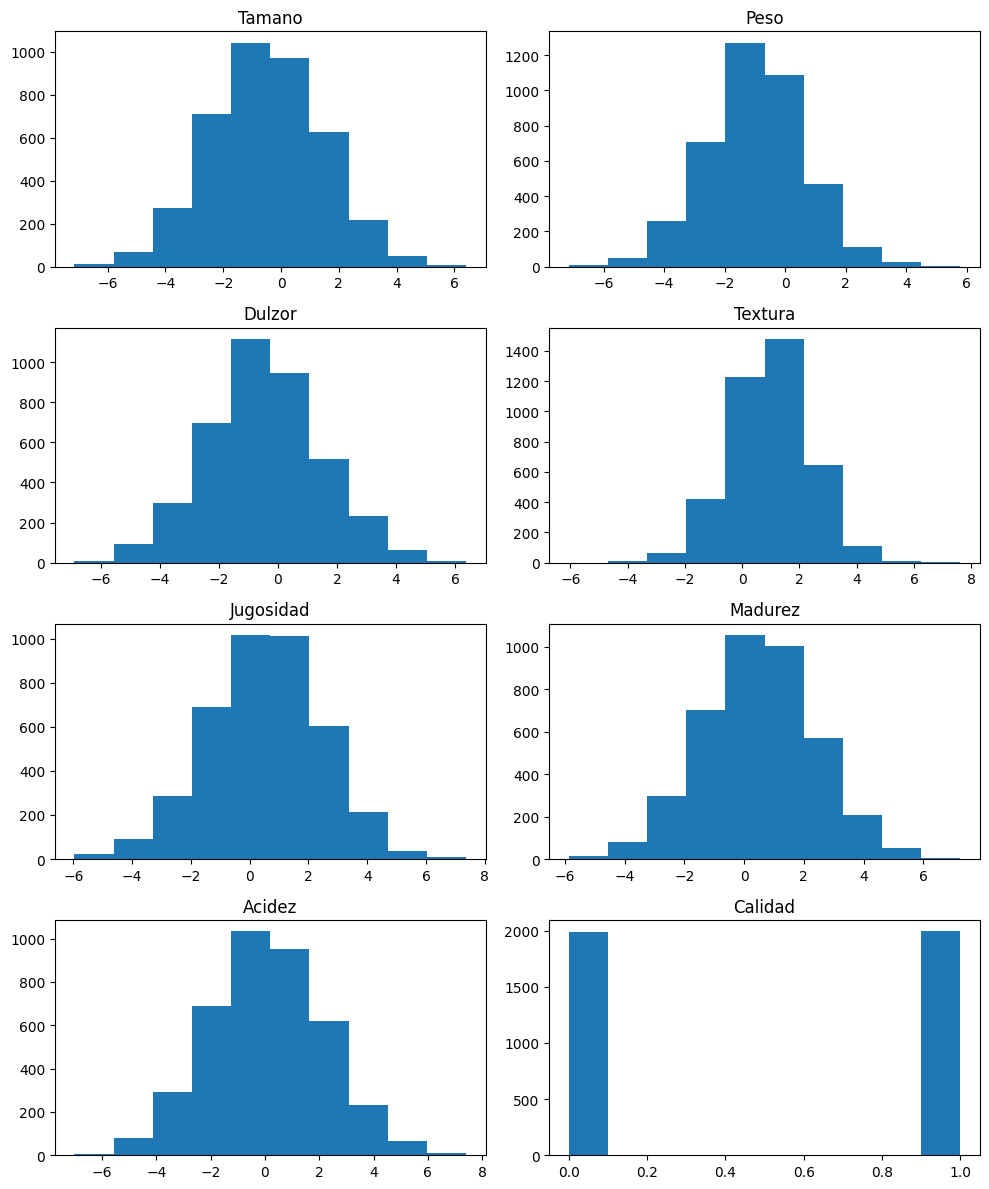

In [21]:
# Vemos dónde están los outliers:
n_rows = df.shape[1] // 2

fig, axes = plt.subplots(n_rows, 2, figsize = (10,12))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=10)
    axes[i]. set_title(col)

plt.tight_layout()
plt.show()

In [22]:
df

,Tamano,Peso,Dulzor,Textura,Jugosidad,Madurez,Acidez,Calidad
A_id,,,,,,,,
0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1.0
1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1.0
2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0.0
3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1.0
4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1.0
...,...,...,...,...,...,...,...,...
3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0.0
3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1.0
3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0.0


In [23]:
df.columns

Index(['Tamano', 'Peso', 'Dulzor', 'Textura', 'Jugosidad', 'Madurez', 'Acidez',
       'Calidad'],
      dtype='object')

Dividir en x_df (input) y y_df (output)

In [24]:
y_df = np.array(df['Calidad'])
x_df = np.array(df.drop('Calidad', axis=1))

print(y_df, x_df)

[1. 1. 0. ... 0. 1. 1.] [[-3.97004852 -2.51233638  5.34632961 ...  1.84490036  0.3298398
  -0.49159048]
 [-1.19521719 -2.83925653  3.66405876 ...  0.8532858   0.86753008
  -0.72280937]
 [-0.29202386 -1.35128199 -1.73842916 ...  2.83863551 -0.03803333
   2.62163647]
 ...
 [-2.6345153  -2.13824672 -2.44046129 ...  2.19970859  4.76385918
  -1.33461139]
 [-4.00800374 -1.77933711  2.36639697 ...  2.16143512  0.21448838
  -2.22971981]
 [ 0.27853965 -1.71550503  0.12121725 ...  1.2666774  -0.77657147
   1.59979646]]


Queda aplicar la red neuronal, pero ya lo he hecho en las anteriores clases y si va a ser con pesos aleatorios, no tiene sentido. Pero quedaría así.

In [ ]:
# Inicinializamos capas.
capa_1 = Capa_densa(7, 12)
capa_2 = Capa densa(12, 4)
output_layer = Capa_densa(4, 2)

# Pasos forward.

capa_1.forward(x_df)
capa_2.forward(capa_1.output)
output_layer.forward(capa_2.output, activation='softmax')

output_layer.output